<a href="https://colab.research.google.com/github/ParhamPishro/Solutions-of-FUM-Academic-Exercises/blob/main/Deep%20Learning/7_GAN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Define the standalone discriminator model
class Discriminator(nn.Module):
    def __init__(self, n_inputs=2):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(n_inputs, 25),
            nn.ReLU(),
            nn.Linear(25, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


# Define the standalone generator model
class Generator(nn.Module):
    def __init__(self, latent_dim, n_outputs=2):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 15),
            nn.ReLU(),
            nn.Linear(15, n_outputs)
        )

    def forward(self, x):
        return self.model(x)


# Generate real samples with class labels
def generate_real_samples(n):
    X1 = np.random.rand(n) - 0.5
    X2 = X1 * X1
    X = np.hstack((X1.reshape(n, 1), X2.reshape(n, 1)))
    y = np.ones((n, 1))
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


# Generate fake samples with class labels
def generate_fake_samples(generator, latent_dim, n):
    latent_points = torch.randn(n, latent_dim)
    X = generator(latent_points).detach()
    y = torch.zeros((n, 1))
    return X, y


# Generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    return torch.randn(n, latent_dim)


# Evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    x_real, y_real = generate_real_samples(n)
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    acc_real = torch.mean((discriminator(x_real) > 0.5).float()).item()
    acc_fake = torch.mean((discriminator(x_fake) < 0.5).float()).item()
    print(f"Epoch {epoch}, Real Acc: {acc_real:.3f}, Fake Acc: {acc_fake:.3f}")
    plt.scatter(x_real[:, 0].numpy(), x_real[:, 1].numpy(), color='red', label="Real")
    plt.scatter(x_fake[:, 0].numpy(), x_fake[:, 1].numpy(), color='blue', label="Fake")
    plt.legend()
    plt.show()


# Train the generator and discriminator
def train(generator, discriminator, gan_model, latent_dim, n_epochs=20000, n_batch=128, n_eval=2000):
    half_batch = n_batch // 2
    loss_fn = nn.BCELoss()
    d_optimizer = optim.Adam(discriminator.parameters(), lr=0.001)
    g_optimizer = optim.Adam(generator.parameters(), lr=0.001)

    for epoch in range(n_epochs):
        # Train discriminator
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)

        d_optimizer.zero_grad()
        d_real_loss = loss_fn(discriminator(x_real), y_real)
        d_fake_loss = loss_fn(discriminator(x_fake), y_fake)
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()

        # Train generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = torch.ones((n_batch, 1))  # inverted labels for the generator

        g_optimizer.zero_grad()
        g_loss = loss_fn(discriminator(generator(x_gan)), y_gan)
        g_loss.backward()
        g_optimizer.step()

        # Evaluate the model
        if (epoch + 1) % n_eval == 0:
            summarize_performance(epoch + 1, generator, discriminator, latent_dim)


Epoch 2000, Real Acc: 0.500, Fake Acc: 1.000


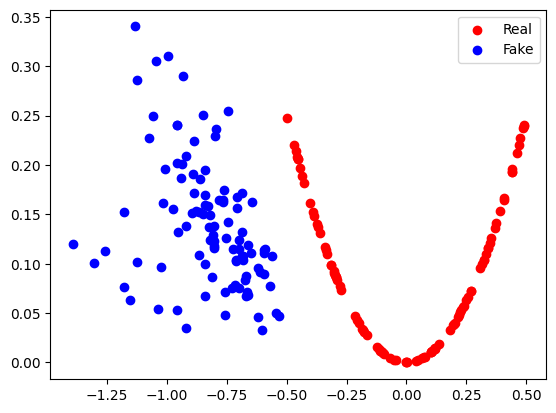

Epoch 4000, Real Acc: 0.280, Fake Acc: 0.030


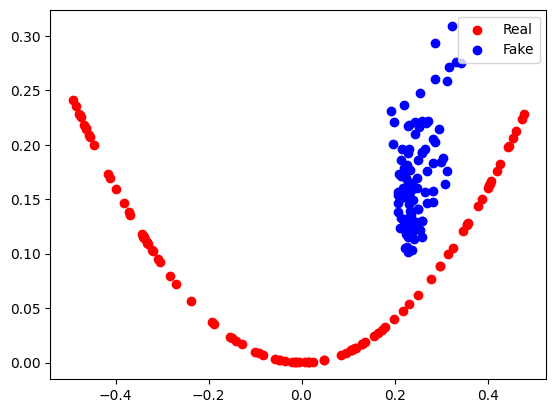

Epoch 6000, Real Acc: 0.500, Fake Acc: 0.320


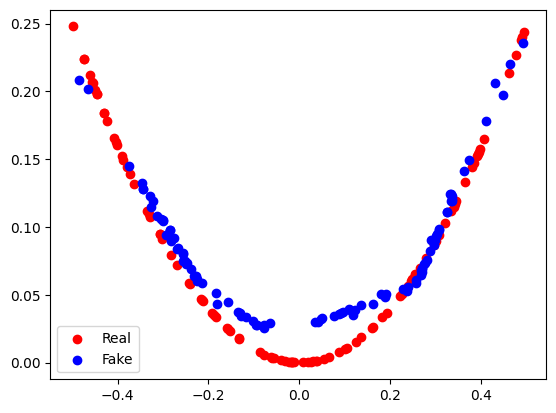

Epoch 8000, Real Acc: 0.330, Fake Acc: 0.620


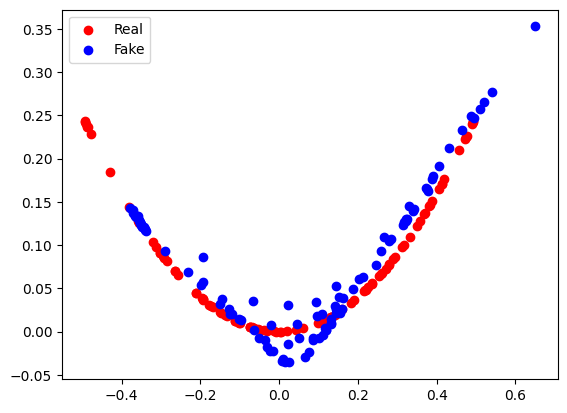

Epoch 10000, Real Acc: 0.670, Fake Acc: 0.310


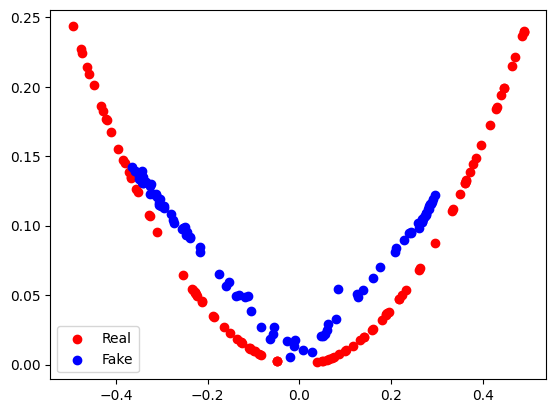

Epoch 12000, Real Acc: 0.570, Fake Acc: 0.340


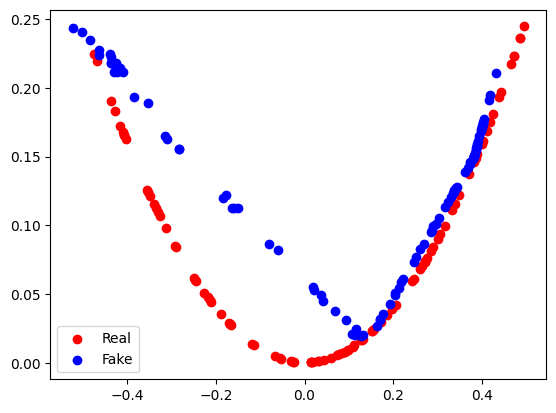

Epoch 14000, Real Acc: 0.490, Fake Acc: 0.550


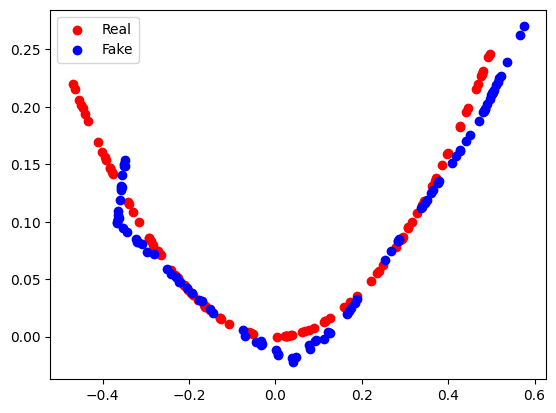

Epoch 16000, Real Acc: 0.410, Fake Acc: 0.430


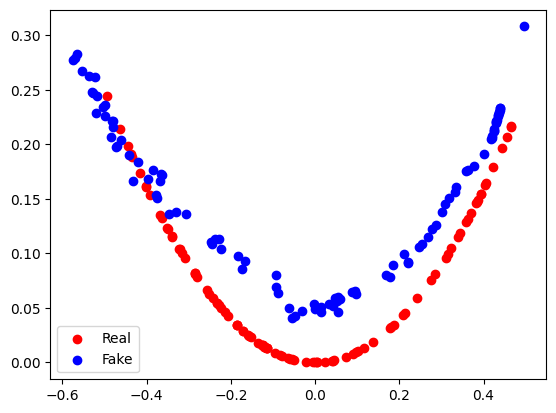

Epoch 18000, Real Acc: 0.400, Fake Acc: 0.530


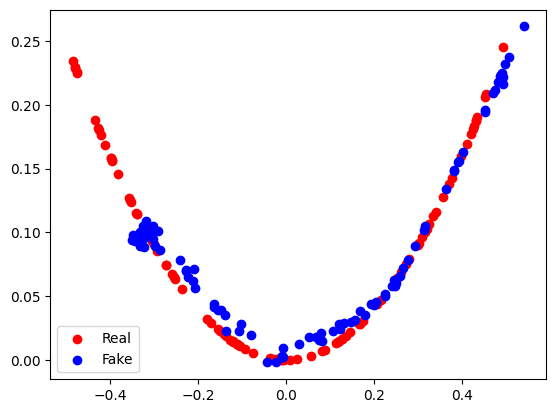

Epoch 20000, Real Acc: 0.360, Fake Acc: 0.730


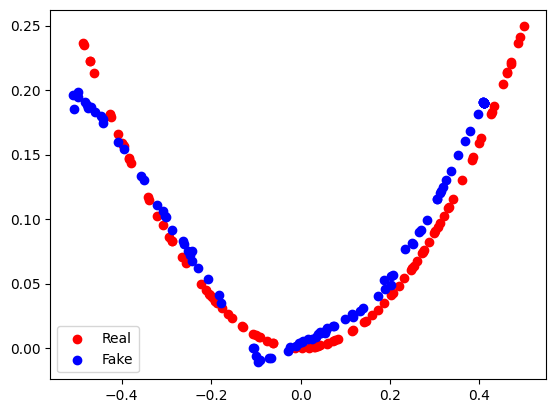

In [ ]:
# Set latent dimension and initialize models
latent_dim = 5
discriminator = Discriminator()
generator = Generator(latent_dim)
gan_model = None  # GAN training is manual in PyTorch
train(generator, discriminator, gan_model, latent_dim)